In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
# Veri aralığını belirle
start = datetime(2022, 1, 1)
end = datetime(2024, 3, 4)

# Veri çekme
df = yf.download('AAPL', start=start, end=end)



[*********************100%%**********************]  1 of 1 completed


In [3]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724548   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443558   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723602   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840225   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008133   
...                ...         ...         ...         ...         ...   
2024-02-26  182.240005  182.759995  180.649994  181.160004  181.160004   
2024-02-27  181.100006  183.919998  179.559998  182.630005  182.630005   
2024-02-28  182.509995  183.119995  180.130005  181.419998  181.419998   
2024-02-29  181.270004  182.570007  179.529999  180.750000  180.750000   
2024-03-01  179.550003  180.529999  177.380005  179.660004  179.660004   

               Volume  
Date         

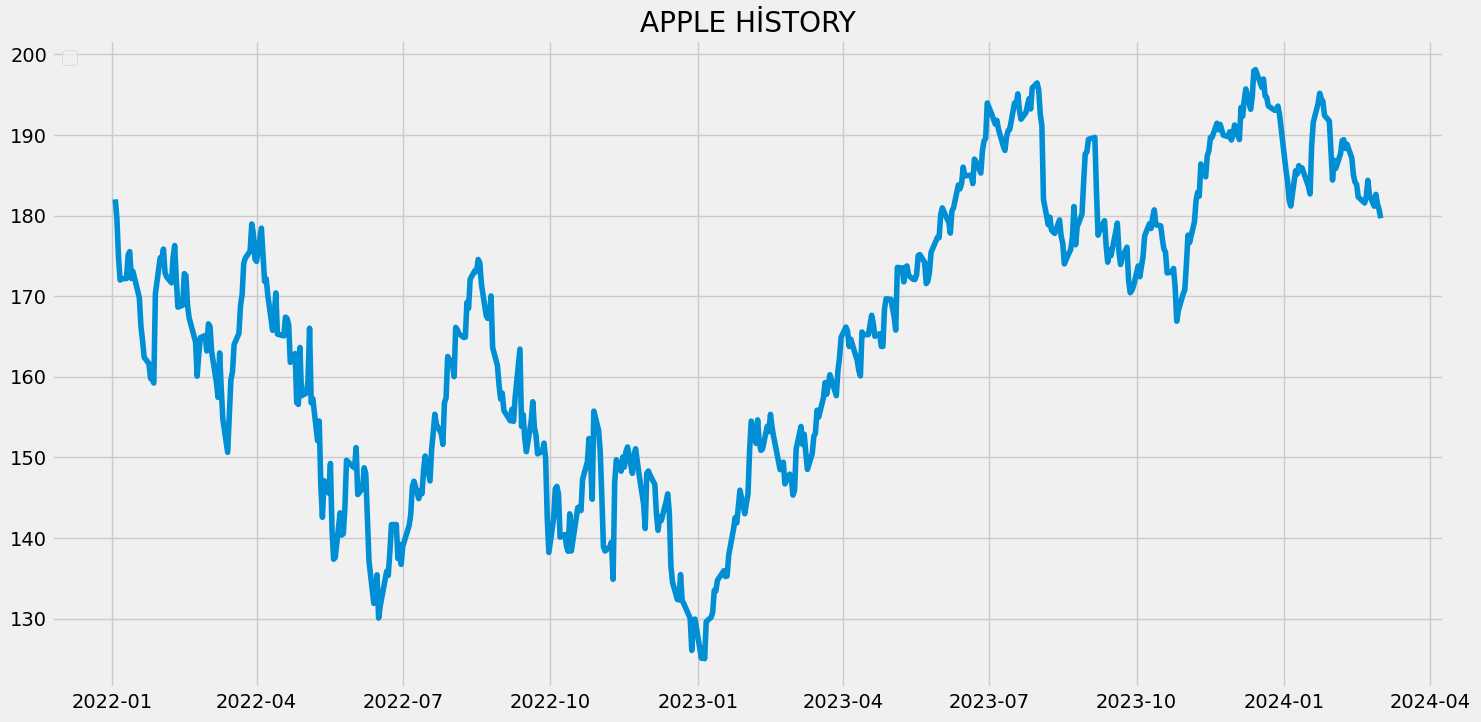

In [4]:
plt.figure(figsize = (16,8))
plt.plot(df["Close"])
plt.title("APPLE HİSTORY")
plt.legend(loc = 'upper left')
plt.show()

In [5]:
SMA30 = pd.DataFrame()
SMA30['Close'] = df["Close"].rolling(window=30).mean()
print(SMA30)


                 Close
Date                  
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
...                ...
2024-02-26  187.248666
2024-02-27  187.138999
2024-02-28  187.065333
2024-02-29  187.000999
2024-03-01  186.701999

[543 rows x 1 columns]


In [6]:
SMA100 = pd.DataFrame()
SMA100['Close'] = df['Close'].rolling(window = 100).mean()
print(SMA100)

               Close
Date                
2022-01-03       NaN
2022-01-04       NaN
2022-01-05       NaN
2022-01-06       NaN
2022-01-07       NaN
...              ...
2024-02-26  185.5152
2024-02-27  185.6175
2024-02-28  185.6951
2024-02-29  185.7535
2024-03-01  185.7752

[543 rows x 1 columns]


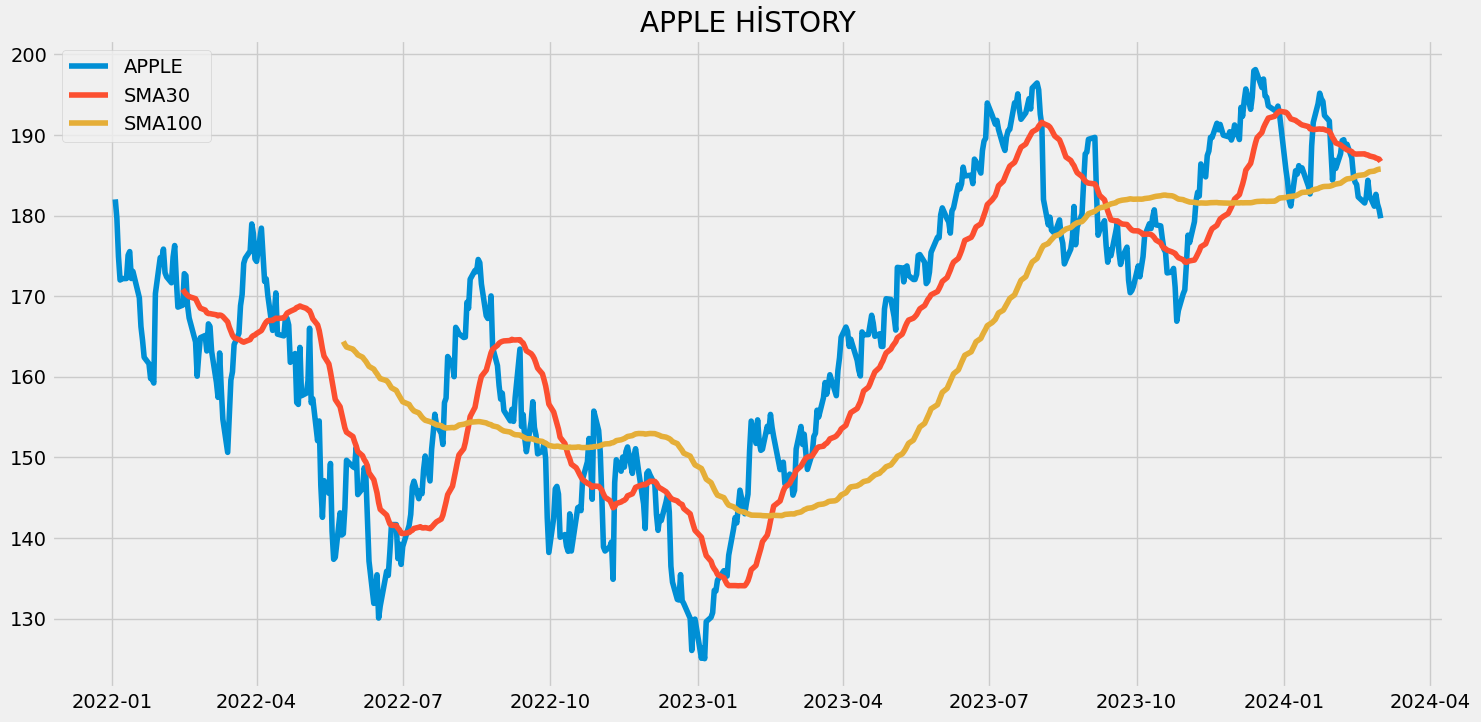

In [7]:
plt.figure(figsize = (16,8))
plt.plot(df["Close"] , label = 'APPLE')
plt.plot(SMA30['Close'] , label = 'SMA30')
plt.plot(SMA100['Close'] , label = 'SMA100')
plt.title("APPLE HİSTORY")
plt.legend(loc = 'upper left')
plt.show()

In [8]:
data = pd.DataFrame()
data['Close'] = df['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']

print(data)

                 Close       SMA30    SMA100
Date                                        
2022-01-03  182.009995         NaN       NaN
2022-01-04  179.699997         NaN       NaN
2022-01-05  174.919998         NaN       NaN
2022-01-06  172.000000         NaN       NaN
2022-01-07  172.169998         NaN       NaN
...                ...         ...       ...
2024-02-26  181.160004  187.248666  185.5152
2024-02-27  182.630005  187.138999  185.6175
2024-02-28  181.419998  187.065333  185.6951
2024-02-29  180.750000  187.000999  185.7535
2024-03-01  179.660004  186.701999  185.7752

[543 rows x 3 columns]


In [9]:

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data["SMA30"][i] < data['SMA100'][i] :
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['Close'][i])
        flag=0
      else :
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)


  return (sigPriceBuy,sigPriceSell)







In [10]:
signal = buy_sell(data)
data['Buy_Signal_Price'] = signal[0]
data['Sell_Signal_Price'] = signal[1]


In [11]:
print(data)

                 Close       SMA30    SMA100  Buy_Signal_Price  \
Date                                                             
2022-01-03  182.009995         NaN       NaN               NaN   
2022-01-04  179.699997         NaN       NaN               NaN   
2022-01-05  174.919998         NaN       NaN               NaN   
2022-01-06  172.000000         NaN       NaN               NaN   
2022-01-07  172.169998         NaN       NaN               NaN   
...                ...         ...       ...               ...   
2024-02-26  181.160004  187.248666  185.5152               NaN   
2024-02-27  182.630005  187.138999  185.6175               NaN   
2024-02-28  181.419998  187.065333  185.6951               NaN   
2024-02-29  180.750000  187.000999  185.7535               NaN   
2024-03-01  179.660004  186.701999  185.7752               NaN   

            Sell_Signal_Price  
Date                           
2022-01-03                NaN  
2022-01-04                NaN  
2022-01-05   

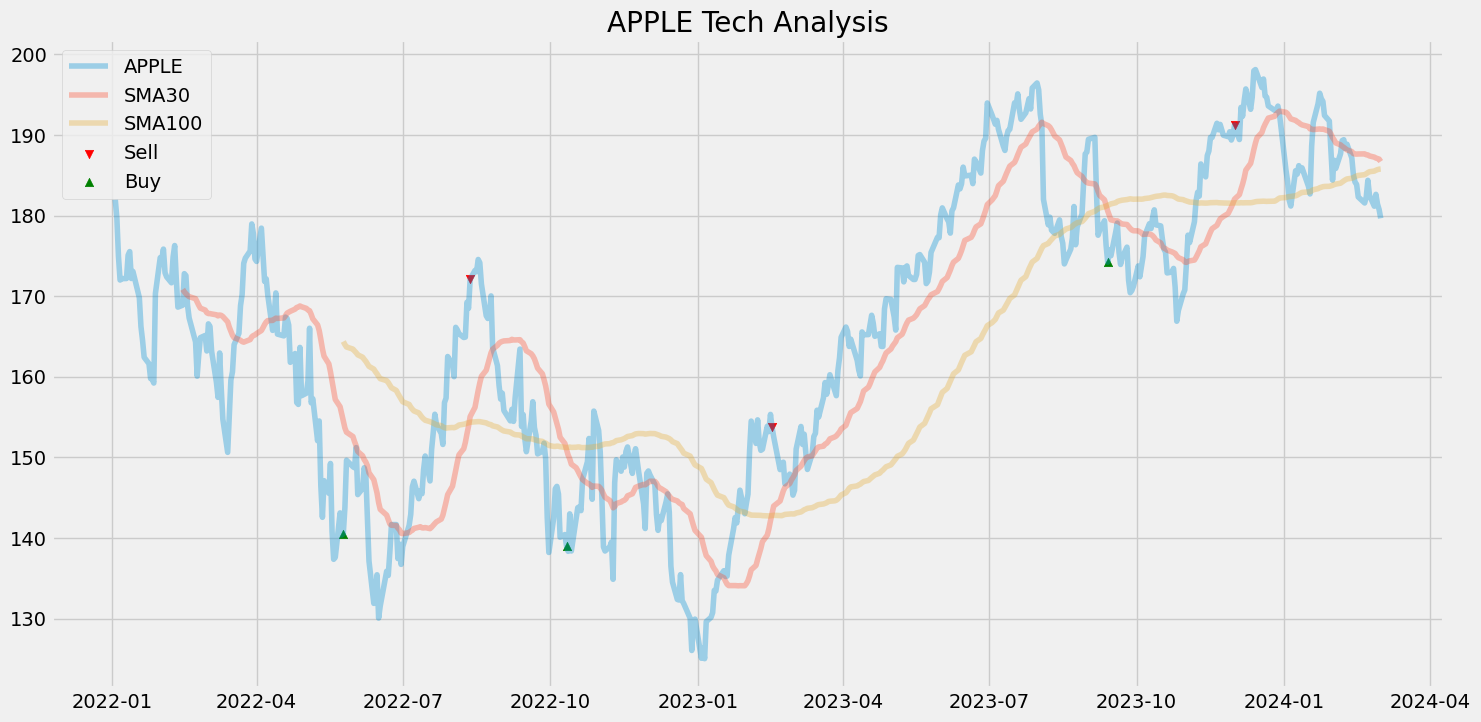

In [12]:
plt.figure(figsize = (16,8))
plt.plot(df["Close"] , label = 'APPLE' , alpha = 0.35)
plt.plot(SMA30['Close'] , label = 'SMA30',alpha = 0.35)
plt.plot(SMA100['Close'] , label = 'SMA100',alpha = 0.35)
plt.scatter(data.index , data['Buy_Signal_Price'] , label='Sell' , marker = 'v' , color ='red')
plt.scatter(data.index , data['Sell_Signal_Price'] , label='Buy' , marker = '^' , color ='green')
plt.title("APPLE Tech Analysis")
plt.legend(loc = 'upper left')
plt.show()